In [1]:
import alphadb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator, FuncFormatter

# Get Price Data

In [2]:
btc_close = alphadb.price.crypto.bar1day.close('BTC.USD').close

In [3]:
btc_current_supply = 18_576_300 # as of Dec 2020
btc_max_supply = 21_000_000

In [4]:
btc_current_marketcap = btc_close * btc_current_supply
btc_total_marketcap = btc_close * btc_max_supply

In [5]:
btc_lndiffs = np.log(btc_close).diff()

In [6]:
btc_lndiffs.mean()*252, btc_lndiffs.std()*np.sqrt(252)

(0.8621578631500502, 1.0146628766652255)

In [7]:
gold_marketcap = 10_000_000_000_000 # ~ 10 trillion

# Plot vs Gold Market Cap

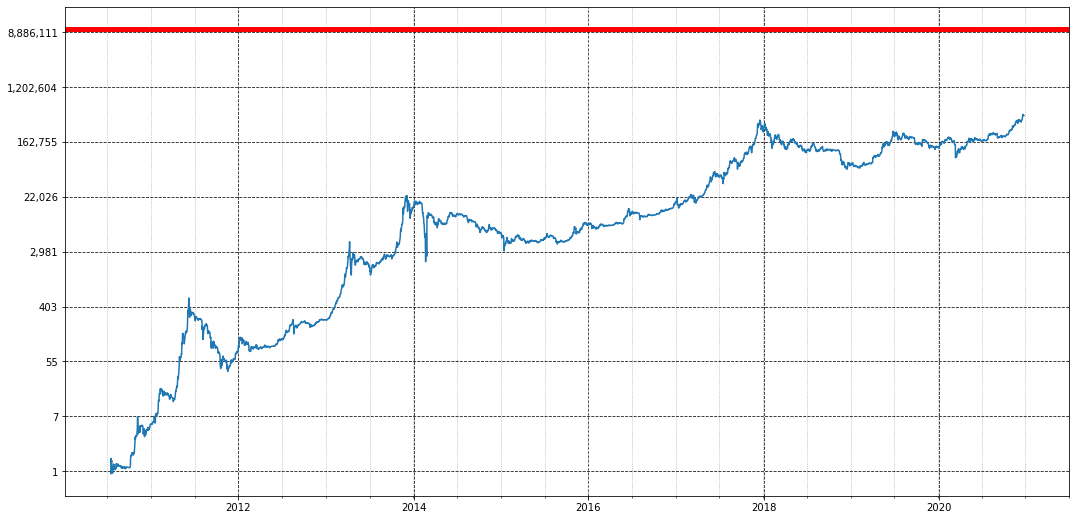

In [8]:
fig, ax = plt.subplots(1,1, figsize=(18, 9))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{np.exp(x):,.0f}' ))
ax.plot(np.log(btc_current_marketcap/1e6))
ax.axhline(np.log(gold_marketcap/1e6), c='red', lw=5)
# formatting
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='#111111', linestyle='--')
ax.grid(which='minor', color='#AAAAAA', linestyle=':')

# What if Gold is replaced by Bitcoin?

In [9]:
# assume bitcoin market cap will at least catch up with the total market cap of gold
btc_current_target_price = gold_marketcap/btc_current_supply
btc_diluted_target_price = gold_marketcap/btc_max_supply

In [10]:
print((f'Bitcoin target price = ${btc_current_target_price:,.0f} (current) / ${btc_diluted_target_price:,.0f} (diluted), '
       'assuming current gold price will be stable in the coming future'))

Bitcoin target price = $538,320 (current) / $476,190 (diluted), assuming current gold price will be stable in the coming future


In [11]:
# where is the moon? the moon is the total market cap of gold
f'{gold_marketcap:,.0f} USD'

'10,000,000,000,000 USD'